### **The Question**
Investigate the financial inclusion in Africa by predicting which individuals are most likely to have or use a bank account.

### **The Metric for Success**
The solution will help provide an indication of the state of financial inclusion in Eastern Africa( specifically Kenya, Rwanda, Tanzania, and Uganda) while providing insights into some of the key demographic factors that might drive individuals’ financial outcomes

### **Context**
Financial Inclusion remains one of the main obstacles to economic and human development in Africa. For example, across Kenya, Rwanda, Tanzania, and Uganda only 9.1 million adults (or 13.9% of the adult population) have access to or use a commercial bank account.

Traditionally, access to bank accounts has been regarded as an indicator of financial inclusion. Despite the proliferation of mobile money in Africa and the growth of innovative fintech solutions, banks still play a pivotal role in facilitating access to financial services. Access to bank accounts enables households to save and facilitate payments while also helping businesses build up their credit-worthiness and improve their access to other financial services. Therefore, access to bank accounts is an essential contributor to long-term economic growth.

In [0]:
# Importing Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import pandas_profiling as pp
import matplotlib.pyplot as plt
%matplotlib inline

In [86]:
# Load the dataset
financial = pd.read_csv("http://bit.ly/FinancialDataset")
financial.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


#### **Get information about the dataset**

In [87]:
financial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
country                   23510 non-null object
year                      23524 non-null int64
uniqueid                  23524 non-null object
Has a Bank account        23488 non-null object
Type of Location          23509 non-null object
Cell Phone Access         23513 non-null object
household_size            23496 non-null float64
Respondent Age            23490 non-null float64
gender_of_respondent      23490 non-null object
The relathip with head    23520 non-null object
marital_status            23492 non-null object
Level of Educuation       23495 non-null object
Type of Job               23494 non-null object
dtypes: float64(2), int64(1), object(10)
memory usage: 2.3+ MB


In [88]:
financial.describe()

,year,household_size,Respondent Age
count,23524.000000,23496.000000,23490.000000
mean,2016.979000,3.681818,38.804300
std,0.899669,2.279933,16.519996
min,2016.000000,0.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2056.000000,21.000000,100.000000


In [89]:
financial.shape

(23524, 13)

In [90]:
# Checking the data types
financial.dtypes

country                    object
year                        int64
uniqueid                   object
Has a Bank account         object
Type of Location           object
Cell Phone Access          object
household_size            float64
Respondent Age            float64
gender_of_respondent       object
The relathip with head     object
marital_status             object
Level of Educuation        object
Type of Job                object
dtype: object

In [91]:
# Getting a comprehensive overview of our dataset using Pandas Profiling 
pp.ProfileReport(financial)

/usr/local/lib/python3.6/dist-packages/pandas_profiling/describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


Number of variables,13
Number of observations,23524
Total Missing (%),0.1%
Total size in memory,2.3 MiB
Average record size in memory,104.0 B
Numeric,3
Categorical,10
Boolean,0
Date,0
Text (Unique),0
Rejected,0


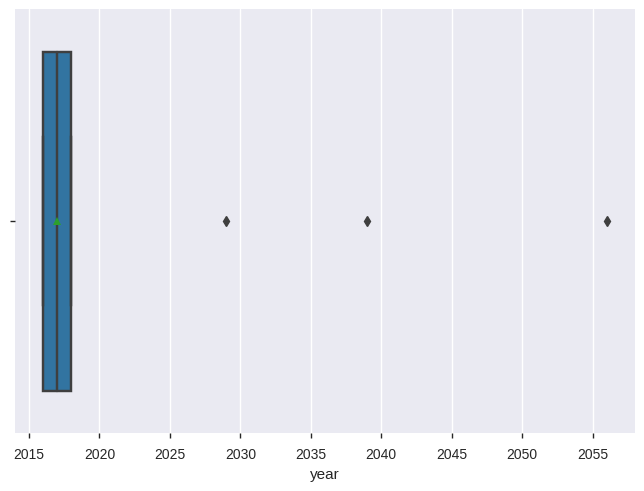

In [92]:
# Checking for outliers in the year column
sns.boxplot(financial["year"], showmeans=True)

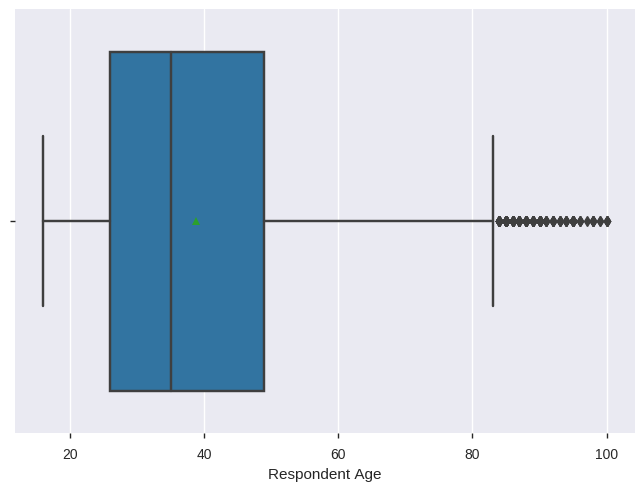

In [93]:
# Checking for outliers in the respondent age column
sns.boxplot(financial["Respondent Age"], showmeans=True)

In [94]:
# Checking for outliers in the numerical columns using IQR
# Household size column

Q1 = financial.household_size.quantile(0.25)
Q3 = financial.household_size.quantile(0.75)

IQR = Q3 - Q1

size_outliers = ((financial.household_size < Q1 - 1.5 * IQR) | (financial.household_size > Q3 + 1.5 * IQR))
size_outliers.value_counts()

False    23147
True       377
Name: household_size, dtype: int64

In [95]:
# Respondent Age column

Q1 = financial['Respondent Age'].quantile(0.25)
Q3 = financial['Respondent Age'].quantile(0.75)

IQR = Q3 - Q1

age_outliers = ((financial['Respondent Age'] < Q1 - 1.5 * IQR) | (financial['Respondent Age'] > Q3 + 1.5 * IQR))
age_outliers.value_counts()

False    23283
True       241
Name: Respondent Age, dtype: int64

### **Tidying the Dataset**

In [98]:
# Impute missing values with Mode
cols = [i for i in financial.columns] #list comprehension: a for loop that runs all the columns
finan=financial[cols].fillna(financial.mode().iloc[0]) #all null values in each column are filled with mode
finan.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [58]:
# # Dropping the null values
# finan = financial.dropna()
# finan.shape

(23343, 13)

In [99]:
# Editing the column names
finan.columns = finan.columns.str.lower().str.replace(' ', '_')
finan.columns

Index(['country', 'year', 'uniqueid', 'has_a_bank_account', 'type_of_location',
       'cell_phone_access', 'household_size', 'respondent_age',
       'gender_of_respondent', 'the_relathip_with_head', 'marital_status',
       'level_of_educuation', 'type_of_job'],
      dtype='object')

In [0]:
# # Changing the column datatypes to categorical
# # We will use a for loop to change all the column dtypes otherthan the household_size and respondent_age columns
# #
# for column in finan[finan.columns.difference(['household_size', 'respondent_age'])].columns: 
#   finanl[column] = financial[column].astype('category') 

# financial.dtypes

In [0]:
# # Creating a list of categorical and numerical data
# all_columns = list(financial.columns)         
# all_columns.remove('household_size')   
# all_columns.remove('respondent_age')   

# categorical_columns = all_columns      

# numerical_columns = ['household_size', 'respondent_age'] 

### **Performing Univariate and Bivariate Analysis**

#### **Univariate Plotting**

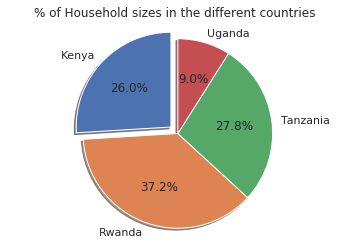

In [74]:
# Distribution of household sizes
country = ['Kenya', 'Rwanda', 'Tanzania', 'Uganda']
household = [6062, 8683, 6500, 2095]
explode = [0.1, 0, 0, 0]
# 
plt.pie(household, labels=country, explode=explode, autopct = '%1.1f%%', shadow = True, startangle = 90)
plt.axis('equal')
plt.title('% of Household sizes in the different countries')
plt.show()



Rwanda has the highest household compared to the other countries with uganda having the lowest no. 

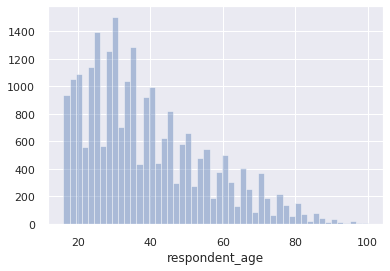

In [75]:
# Plotting a histogram of the respondent's ages
# 
sns.distplot(financial.respondent_age, kde = False)

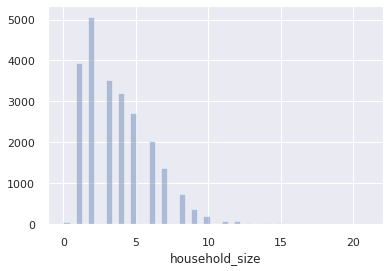

In [76]:
# Plotting a histogram of the household sizes
sns.distplot(financial.household_size, kde = False)

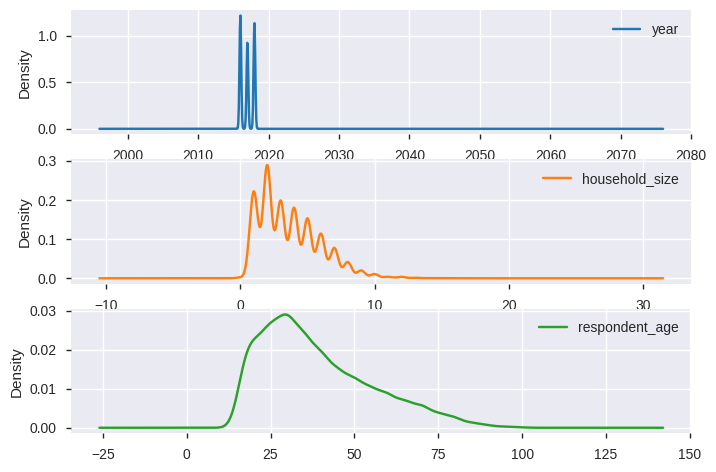

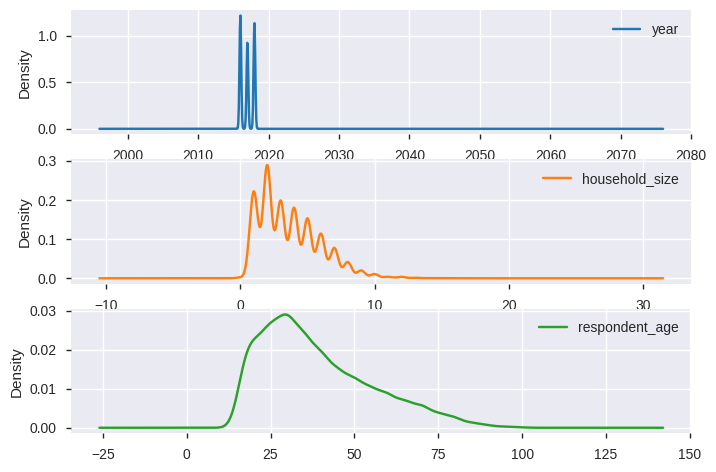

In [101]:
# Univariate Density Plots
from matplotlib import pyplot
# fig, ax = plt.subplots(len(col_names), figsize=(8,20))
names = ['country', 'year', 'uniqueid', 'has_a_bank_account', 'type_of_location',
       'cell_phone_access', 'household_size', 'respondent_age',
       'gender_of_respondent', 'the_relathip_with_head', 'marital_status',
       'level_of_educuation', 'type_of_job']
finan.plot(kind= 'density' , subplots=True, sharex=False)
pyplot.show(0)

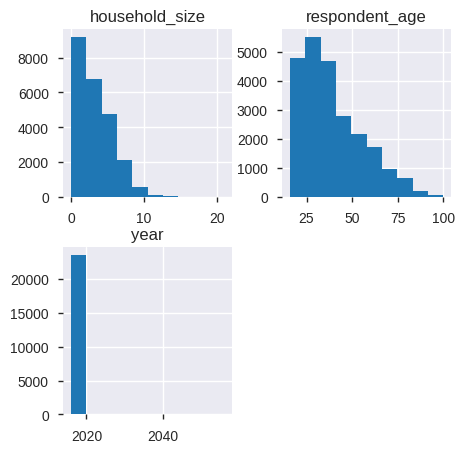

In [110]:
# Univariate Histograms
from matplotlib import pyplot
names = ['country', 'year', 'uniqueid', 'has_a_bank_account', 'type_of_location',
       'cell_phone_access', 'household_size', 'respondent_age',
       'gender_of_respondent', 'the_relathip_with_head', 'marital_status',
       'level_of_educuation', 'type_of_job']
finan.hist(figsize=(5,5))
pyplot.show()

In [0]:
# Ploting the univariate summaries and recording our observations
#
#code to plot the univariate distribution of the numerical columns which contains the histograms and the estimated PDF. 
#We use displot of the seaborn library to plot this graph
col_names = ['country', 'year', 'uniqueid', 'has_a_bank_account', 'type_of_location',
       'cell_phone_access', 'household_size', 'respondent_age',
       'gender_of_respondent', 'the_relathip_with_head', 'marital_status',
       'level_of_educuation', 'type_of_job']

fig, ax = plt.subplots(len(col_names), figsize=(15,40))

for i, col_val in enumerate(col_names):

    sns.distplot(finan[col_val], hist=True, ax=ax[i])
    ax[i].set_title('Freq dist '+col_val, fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
    ax[i].set_ylabel('Count', fontsize=8)

plt.show()

#### **Bivariate Plotting**

In [62]:
#checking the distribution of categorical levels in each column
print(financial['country'].value_counts())

Rwanda      8684
Tanzania    6500
Kenya       6064
Uganda      2095
Name: country, dtype: int64


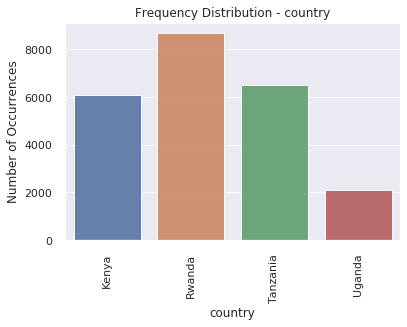

In [63]:
#plot a barplot of the frequency distribution of a categorical feature using the seaborn package, 
# which shows the frequency distribution of the 'Type of Job' column
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
country_count = financial['country'].value_counts()
sns.set(style="darkgrid")
sns.barplot(country_count.index, country_count.values, alpha=0.9)
plt.title('Frequency Distribution - {}'.format(col_val))
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('country', fontsize=12)
plt.xticks(rotation=90)
plt.show()

In [64]:
print(financial['has_a_bank_account'].value_counts())

No     20046
Yes     3297
Name: has_a_bank_account, dtype: int64


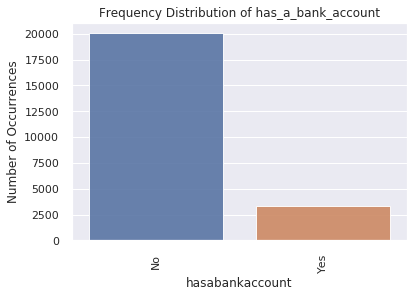

In [65]:
#plot a barplot of the frequency distribution of a categorical feature using the seaborn package, 
# which shows the frequency distribution of the 'Has a bank acount' column
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
hasabankaccount_count = financial['has_a_bank_account'].value_counts()
sns.set(style="darkgrid")
sns.barplot(hasabankaccount_count.index, hasabankaccount_count.values, alpha=0.9)
plt.title('Frequency Distribution of has_a_bank_account')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('hasabankaccount', fontsize=12)
plt.xticks(rotation=90)
plt.show()

In [66]:
print(financial['type_of_location'].value_counts())

Rural    14264
Urban     9079
Name: type_of_location, dtype: int64


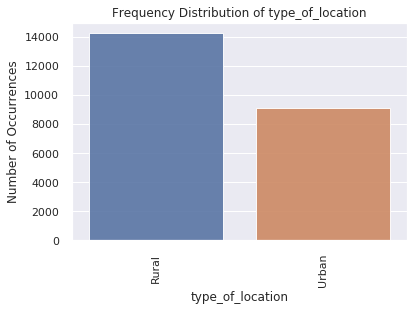

In [67]:
#plot a barplot of the frequency distribution of a categorical feature using the seaborn package, 
# which shows the frequency distribution of the 'Type of location' column
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
typeoflocation_count = financial['type_of_location'].value_counts()
sns.set(style="darkgrid")
sns.barplot(typeoflocation_count.index, typeoflocation_count.values, alpha=0.9)
plt.title('Frequency Distribution of type_of_location')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('type_of_location', fontsize=12)
plt.xticks(rotation=90)
plt.show()

In [68]:
print(financial['cell_phone_access'].value_counts())

Yes    17334
No      6009
Name: cell_phone_access, dtype: int64


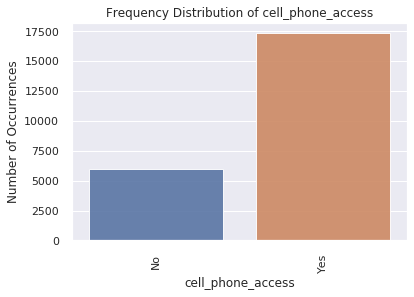

In [69]:
#plot a barplot of the frequency distribution of a categorical feature using the seaborn package, 
# which shows the frequency distribution of the 'Type of Job' column
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
cellphoneaccess_count = financial['cell_phone_access'].value_counts()
sns.set(style="darkgrid")
sns.barplot(cellphoneaccess_count.index, cellphoneaccess_count.values, alpha=0.9)
plt.title('Frequency Distribution of cell_phone_access')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('cell_phone_access', fontsize=12)
plt.xticks(rotation=90)
plt.show()

In [70]:
print(financial['gender_of_respondent'].value_counts())

Female    13767
Male       9576
Name: gender_of_respondent, dtype: int64


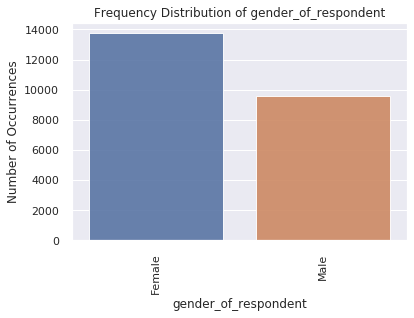

In [71]:
#plot a barplot of the frequency distribution of a categorical feature using the seaborn package, 
# which shows the frequency distribution of the 'Type of Job' column
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
genderofrespondent_count = financial['gender_of_respondent'].value_counts()
sns.set(style="darkgrid")
sns.barplot(genderofrespondent_count.index, genderofrespondent_count.values, alpha=0.9)
plt.title('Frequency Distribution of gender_of_respondent')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('gender_of_respondent', fontsize=12)
plt.xticks(rotation=90)
plt.show()

In [72]:
print(financial['the_relathip_with_head'].value_counts())

Head of Household      12730
Spouse                  6471
Child                   2221
Parent                  1069
Other relative           663
Other non-relatives      189
Name: the_relathip_with_head, dtype: int64


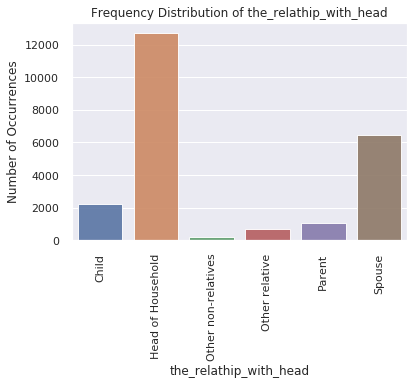

In [73]:
#plot a barplot of the frequency distribution of a categorical feature using the seaborn package, 
# which shows the frequency distribution of the 'Type of Job' column
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
therelathipwithhead_count = financial['the_relathip_with_head'].value_counts()
sns.set(style="darkgrid")
sns.barplot(therelathipwithhead_count.index, therelathipwithhead_count.values, alpha=0.9)
plt.title('Frequency Distribution of the_relathip_with_head')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('the_relathip_with_head', fontsize=12)
plt.xticks(rotation=90)
plt.show()

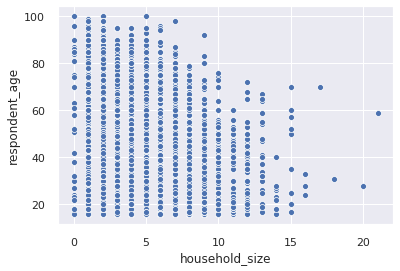

In [77]:
# Displaying a scatterplot to see the relationship between the numerical columns
sns.scatterplot(financial.household_size, financial.respondent_age)

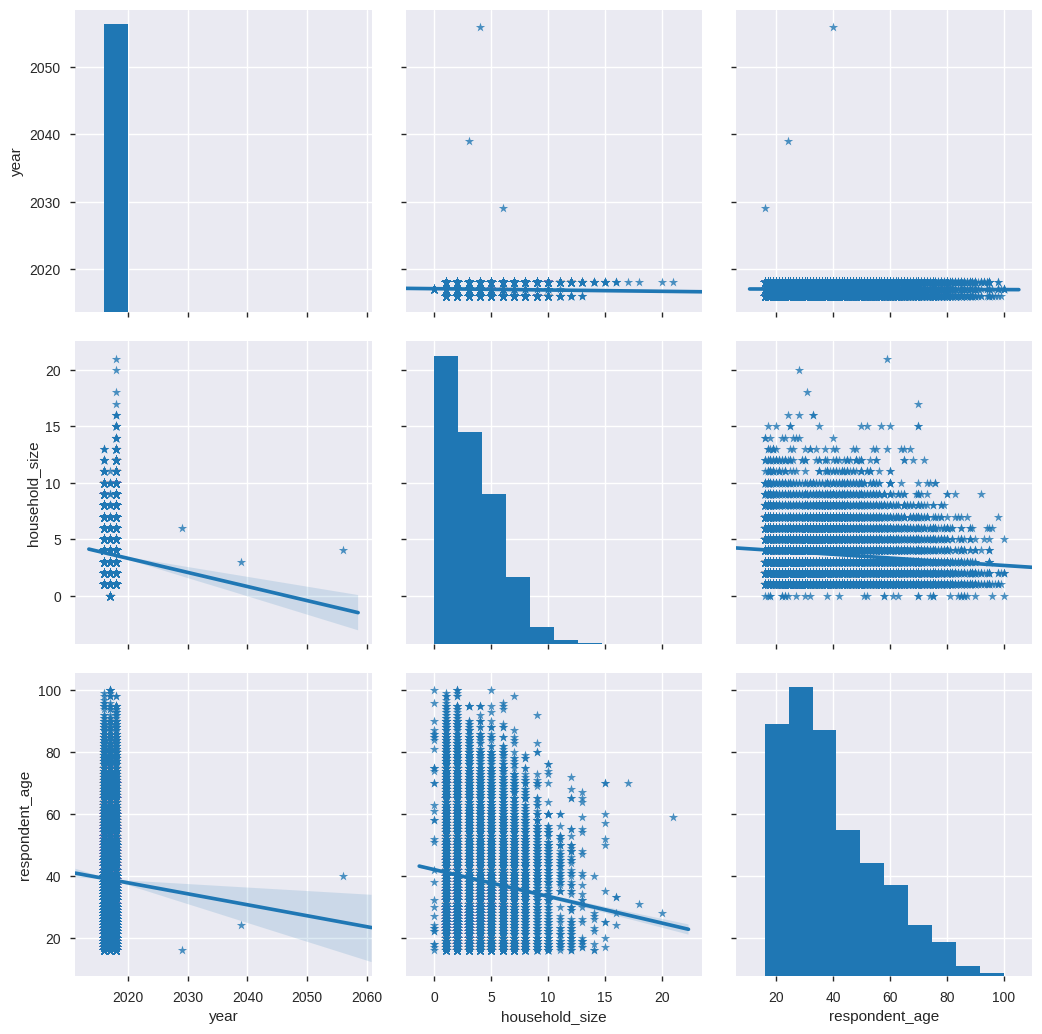

In [113]:
 #we use the pairplot() function of the seaborn package to plot the bivariate distributions
sns.pairplot(finan, kind="reg",height=3.5,aspect=1, markers="*")

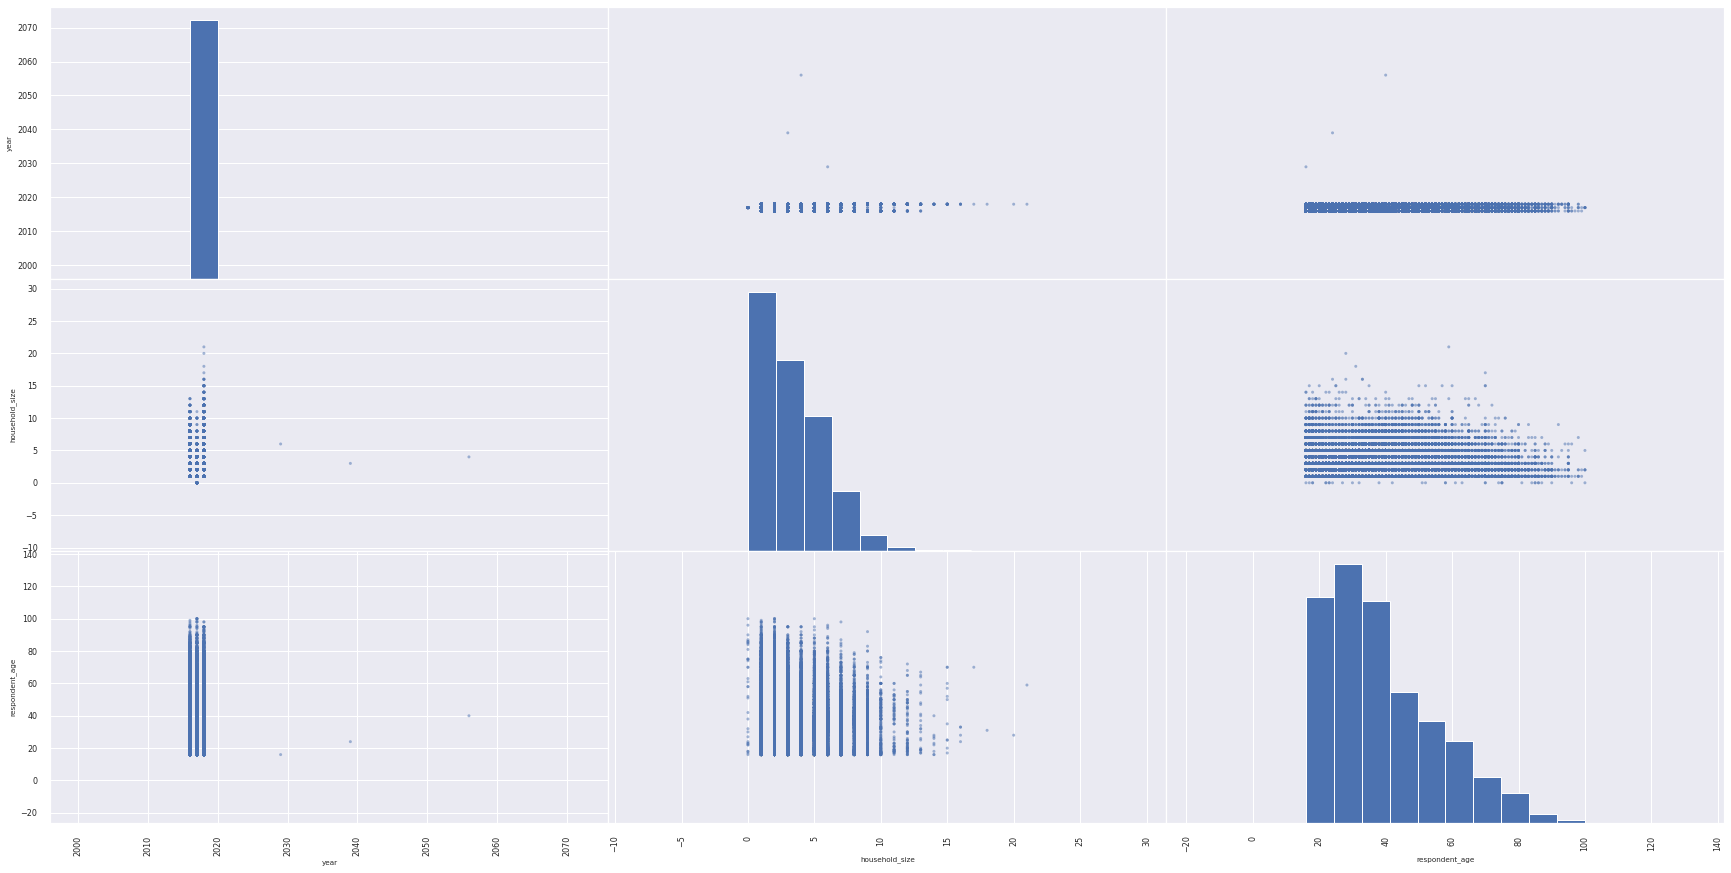

In [116]:
# Scatterplot Matrix
from matplotlib import pyplot
from pandas import read_csv
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
% matplotlib inline
sns.set(font_scale=0.6)
from pandas import plotting
#plotting.scatter_matrix(data2[['country',	'year',	'uniqueid',	'hasabankaccount',	'typeoflocation',	'cellphoneaccess',	'householdsize',	'respondentage',	'genderofrespondent',	'therelathipwithhead',	'maritalstatus',	'levelofeducuation',	'typeofjob']])

#plt.figure(figsize=(20, 8))
#plt.scatter(steps, calories_burned, c='green', s=70, alpha=0.5)
scatter_matrix(finan,grid=True,diagonal='hist',marker='.',range_padding=1.0,figsize=(30,15))
pyplot.show()

In [0]:
# Encoding the categorical columns
x = pd.get_dummies(x)
x.head()

In [0]:
# Checking for adequacy using the bartlett sphericity method
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

chi_square_value,p_value=calculate_bartlett_sphericity(x)
chi_square_value, p_value

# Since the p value is 0, then the test is statistically significant and we can therefore proceed with the factor analysis